<a href="https://colab.research.google.com/github/cubedc71/colab-notebooks/blob/main/SEA_project_chatGPT_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistique et économétrie appliquées: introduction
### Printemps 2025

## Projet: Effet de chatGPT sur le codage

### Contexte
Le projet repose sur les données de Stack Overflow et vise à analyser l'impact du lancement de ChatGPT, survenu la semaine du 28 novembre 2022, sur le codage. Pour ce faire, il examine l'activité sur la plateforme et les questions liées au codage posées par les utilisateurs. Les données recueillies permettent notamment de comparer les questions portant sur Python et R.

### Consignes
*   Nombre maximal de points: 100
*   Le nombre entre parenthèses derrière la question indique le nombre de points par question.
*   Entre 3 et 4 participants par groupe
*   Vous devez rendre ce projet au plus tard: **le vendredi 30 Mai à 23h55**
sur Moodle via la plateforme prévue à cet effet. Une fois le projet envoyé, vous pouvez modifier les fichiers envoyés avant la date limite. L’envoi du projet par un membre de votre groupe engage tout le groupe.
*   Pour la version finale, veuillez rendre **un fichier .ipynb contenant tout les résultats**. Veuillez renommer le fichier avec le numéro de votre groupe (p.ex. G1.ipynb).

Nous encourageons les réponses courtes et concises et le nombre maximum de mots ou de phrases indiqué doit être respecté (des déductions de points pourront être appliquées).
Vous pouvez utiliser un seuil de significativité de 5\% dans la discussion de vos résultats.

### Informations sur les données
Les données de ce projet ont été extraites de Stack Overflow et couvrent la période du 17 octobre 2022 au 19 mars 2023. Elles ont été agrégées chaque semaine pour réduire le bruit et comprennent des informations sur le nombre de messages, de vues, de scores et de questions sans réponse.  Les variables utilisées sont les suivantes :

*   *date* : La date hebdomadaire de chaque observation.
*   *week* : Un indice du numéro de la semaine dans l'échantillon.
*   *python* : Dummy variable pour les questions liées à Python.
*   *chatgpt* : Indicateur pour la période suivant la publication de ChatGPT.
*   *question* : Nombre de questions posées par semaine.
*   *vote_mean* : Le score moyen par question, reflétant la qualité perçue par les utilisateurs.
*   *noanswer_mean* : La proportion de questions laissées sans réponse.
*   *view_mean* : Le nombre moyen de vues par question.

------

## Project: Effect of chatGPT on coding

### Context
The project is based on data from Stack Overflow. The goal is to understand the impact of ChatGPT's release in the week of the 28th November 2022 on coding, by using the activity on the platform and analysing coding related questions posed on Stack Overflow. The dataset allows for a comparison between Python and R questions.

### Instructions
*   Maximum number of points: 100
*   The number in brackets behind the question indicates the number of points per question.
*   Between 3 and 4 participants per group.
*   You must submit this project no later than **Friday, May 30th at 23:55** on Moodle via the designated platform. Once the project is submitted, you can modify the files sent before the deadline. Submitting the project by one group member commits the entire group.
*   For the final version, please submit a **.ipynb file containing all the results**. Please rename the file with your group number (e.g., G1.ipynb).

We encourage short and concise answers, and the maximum number of words or sentences indicated must be respected (point deductions may apply).
You can use a 5% significance level in the discussion of your results.

### Data information
The data for this project was extracted from Stack Overflow and covers the period from October 17, 2022, to March 19, 2023. It has been aggregated weekly to reduce noise and includes information on the number of posts, views, scores, and unanswered questions.  The variables used include:

*   *date* : The weekly date of each observation.
*   *week* : A index of the number of the week in the sample.
*   *python* : Dummy variable for Python-related questions.
*   *chatgpt* : Indicator for the period after ChatGPT's release.
*   *question* : The number of questions asked per week.
*   *vote_mean* : The average score per question, reflecting user-perceived quality.
*   *noanswer_mean* : The proportion of questions left unanswered.
*   *view_mean* : The average number of views per question.


## 0. Set up

Cette section initialise le fichier et charge les paquets nécessaires – **aucune modification n’est requise**. Toutes les questions peuvent être résolues en utilisant ces paquets. Si vous souhaitez en ajouter d’autres, vous pouvez adapter cette section, mais veillez à ce que le fichier fonctionne correctement avant de le soumettre !

---

This section sets up the file and loads the necessary packages - **you do not have to adjust it**. All questions can be answered using these packages. In case you want to use additional/other packages, you can adjust this section. However, make sure that the file runs through before submitting it!


In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
!pip install linearmodels
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import skew
import numpy as np
from datetime import datetime
import linearmodels as lm
from linearmodels import PanelOLS
from IPython.display import Image, display
import matplotlib.dates as mdates
from linearmodels.panel.results import compare

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00


## 1. Charger les données et les nettoyer / Load data and clean it (20)

**a)** Préparation des données: (2)
* Chargez les données (assurez-vous d'avoir "mount your Drive" dans la section ci-dessus). (1)
* Convertissez la colonne *date* au format 'datetime'. (1)

---

**a)** Data preparation: (2)
*   Load the data (make sure you have mounted your Drive in the section above). (1)
*   Convert the *date* column to 'datetime' format. (1)

In [ ]:
# Votre code ci-dessous / Your code here below:
from google.colab import files

import os
#os.listdir("/content/drive/MyDrive/shared_folder_for SEA_Project")

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/shared_folder_for SEA_Project/SEA_project_chatGPT_data.csv")

df['date'] = pd.to_datetime(df['date'])

display(df['date'])

# Put comments and edit explanations here -j:
# Let's make sure the path to the data is the same for all of us so no need to edit everytime
# I shared a file with you guys, keep it in 'MyDrive' so that the first pd.read function works -j
# Also the os.listdir also works for me now, if it works for all of us we can just use that -j
#os.listdir doesn't work for me -c
#but the first line of pathway works correctly for me, just added the share file from James into My Drive and that'll do most likely
# done -j,e

,date
0,2022-10-17
1,2022-10-24
2,2022-10-31
3,2022-11-07
4,2022-11-14
5,2022-11-21
6,2022-11-28
7,2022-12-05
8,2022-12-12
9,2022-12-19



**b)** Ajustement des données: (4)
* Ne conserver que les colonnes suivantes dans les données (supprimer toutes les autres): *python, chatgpt, question, vote_mean, noanswer_mean, view_mean, date, week*. (2)
* Réorganisez les colonnes dans l'ordre suivant: *date, week, python, chatgpt, question, vote_mean, noanswer_mean, view_mean*. (2)

---

**b)** Data adjustment: (4)
*   Keep only the following columns in the dataset (drop all others): *python, chatgpt, question, vote_mean, noanswer_mean, view_mean, date, week*. (2)
*   Reorder the columns in the following order: *date, week, python, chatgpt, question, vote_mean, noanswer_mean, view_mean*. (2)



In [ ]:
# Votre code ci-dessous / Your code here below:

col_drop = ['length', 'reputation', 'vote', 'view', 'answer', 'accept', 'vote_neg',
                           'noanswer', 'top50', 'top75', 'top10', 'length_trunc', 'answer_mean',
                           'vote_neg_mean', 'top10_p', 'top50_p', 'top75_p', 'accept_mean',
                           'length_mean', 'length_trunc_mean']

df = df.drop(col_drop,axis = 1, errors='ignore')

reorder = ['date', 'week', 'python', 'chatgpt', 'question', 'vote_mean', 'noanswer_mean', 'view_mean']
df = df[reorder]

display(df)

# Put comments and edit explanations here -j:
# They ask to "drop" so let's use the dedicated function even if it's tedious -j
# done -j

,date,week,python,chatgpt,question,vote_mean,noanswer_mean,view_mean
0,2022-10-17,1,0,0,1048,0.553435,0.312977,96.020038
1,2022-10-24,2,0,0,1053,0.672365,0.300095,105.867047
2,2022-10-31,3,0,0,1015,0.630542,0.314286,104.582266
3,2022-11-07,4,0,0,1030,0.442718,0.325243,95.126214
4,2022-11-14,5,0,0,1132,0.497350,0.286219,113.293286
5,2022-11-21,6,0,0,1060,0.511321,0.314151,95.472642
6,2022-11-28,7,0,0,964,0.511411,0.282158,102.993776
7,2022-12-05,8,0,1,1037,0.452266,0.320154,95.409836
8,2022-12-12,9,0,1,968,0.551653,0.287190,101.217975
9,2022-12-19,10,0,1,914,0.533917,0.280088,95.318381


**c)** Examinez les données de plus près: (5)
* Vérifiez si les données contiennent des valeurs manquantes. (1)
* Examinez les données en détail en calculant les statistiques suivantes : nombre d'observations, moyenne, minimum, maximum, médiane et écart-type. Affichez ensuite les résultats. (2)
* Que mesure l'écart-type? Expliquez-le en deux phrases maximum. (2)

---

**c)** Closer look at the data: (5)
*   Check whether the data contains missing values. (1)
*   Take a closer look at the data, i.e. look at the following statistics: number of observations, mean, min, max, median and standard deviation. Print the result. (2)
*   What does the standard deviation measure? Explain in max two sentences. (2)



In [ ]:
# Votre code ci-dessous / Your code here below:

# Check whether the data contains missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print("\nTotal missing values:", df.isnull().sum().sum())

# Descriptive statistics
print("\n\nDescriptive Statistics:")
# Number of observations
print(f"\nNumber of observations: {len(df)}")

# Calculate mean, min, max, median, and standard deviation
stats = df.describe().T[['mean', 'min', 'max', '50%', 'std']]
# rename the '50%' column to 'median' for clarity
stats = stats.rename(columns={'50%': 'median'})
print(stats)

# what does standard deviation measure?
print("\nWhat does standard deviation measure?:")
print("Standard deviation measures the amount of variation or dispersion in a dataset, indicating how far values typically deviate from the mean")


# Put comments and edit explanations here -j:
# done -j



Missing values in each column:
date             0
week             0
python           0
chatgpt          0
question         0
vote_mean        0
noanswer_mean    0
view_mean        0
dtype: int64

Total missing values: 0


Descriptive Statistics:

Number of observations: 44
                              mean                  min                  max  \
date           2022-12-29 12:00:00  2022-10-17 00:00:00  2023-03-13 00:00:00   
week                          11.5                  1.0                 22.0   
python                         0.5                  0.0                  1.0   
chatgpt                   0.681818                  0.0                  1.0   
question               2666.772727                588.0               5331.0   
vote_mean                  0.35923             0.134326             0.672365   
noanswer_mean             0.318011             0.260204             0.364531   
view_mean               142.491891             73.60022            249.66644   

    

**d)** Description des données: (6)
* Combien de valeurs différentes la variable *python* a-t-elle? Combien d'observations contient chaque valeur? Affichez le résultat. (2)
* Combien de semaines (observations) y a-t-il dans l'ensemble de données où ChatGPT a été utilisé? (2)
* Pour combien d'entre elles Python a-t-il été utilisé, et pour combien d'entre elles R a-t-il été utilisé? (2)

---

**d)** Data description: (6)
*   How many different values does the variable *python* have? How many observations are in each value? Print the result. (2)
*   How many weeks (observations) are in the dataset where ChatGPT was used? (2)
*   In how many of these was Python used, in how many was R used? (2)



In [ ]:
# Votre code ci-dessous / Your code here below:
var = df['python'].unique()
num = len(df['python'].unique())
print(f"It's a binary variable, so it has {num} variables which are {var[0]} and {var[1]}")

#calculate the total number of weeks where chatgpt == 1
chat_weeks = df[df['chatgpt'] == 1]['week'].count()
print(f"There are {chat_weeks} weeks where ChatGPT was used.")

#for python as well
pyn_used = df[(df['chatgpt'] == 1) & (df['python'] == 1)].shape[0]
print(f"In {pyn_used} observations with ChatGPT Python was used")

#for R
r_used = df[(df['chatgpt'] == 1) & (df['python'] == 0)].shape[0]
print(f"In {r_used} observations with ChatGPT R was used")

# Put comments and edit explanations here -j:
# done -j

It's a binary variable, so it has 2 variables which are 0 and 1
There are 30 weeks where ChatGPT was used.
In 15 observations with ChatGPT Python was used
In 15 observations with ChatGPT R was used


**e)** Manipulation des données: (3)
* Créez une nouvelle variable représentant le terme d'interaction entre *python* et *chatgpt*. Nommez-la *interaction*. (2)
* Supprimez à nouveau le terme d'interaction. (1)

---

**e)** Data manipulation: (3)
*   Create a new variable which is the interaction term between the *python* and *chatgpt*. Call it *interaction*. (2)
*   Drop the interaction term again. (1)



In [ ]:
# Votre code ci-dessous / Your code here below:

# Create a new variable which is the interaction term between the python and chatgpt
df['interaction'] = df['python'] * df['chatgpt']

# Show a sample of the data with the new variable
print(df[['python', 'chatgpt', 'interaction']])
# print(df[['python', 'chatgpt', 'interaction']].head())

# Drop the interaction term again
df = df.drop('interaction', axis=1)

print("\n")

# Verify the interaction term was dropped
#print(df.columns.tolist())
print(df.columns)

# Put comments and edit explanations here:
# I removed "head.()"
# normally a sample is nice but since the data that we are working with are at the bottom of the df it's not as useful -j
# yes i agree i just put it bec to check if the code worked, we can remove it completely -e
# oki -j
# done -j

    python  chatgpt  interaction
0        0        0            0
1        0        0            0
2        0        0            0
3        0        0            0
4        0        0            0
5        0        0            0
6        0        0            0
7        0        1            0
8        0        1            0
9        0        1            0
10       0        1            0
11       0        1            0
12       0        1            0
13       0        1            0
14       0        1            0
15       0        1            0
16       0        1            0
17       0        1            0
18       0        1            0
19       0        1            0
20       0        1            0
21       0        1            0
22       1        0            0
23       1        0            0
24       1        0            0
25       1        0            0
26       1        0            0
27       1        0            0
28       1        0            0
29       1

## 2. Explorative Data Analysis (EDA) (15)

**a)** Analyse de la variable *question* : (5)
* Créez deux nouveaux ensembles de données distincts : l'un où la variable *python* est égale à 1, l'autre où la variable *python* est égale à 0. (2)
* Créez un graphique avec la variable *date* sur l'axe de x et la variable *question* sur l'axe de y. Assurez-vous d'avoir deux lignes distinctes représentent *question* : l’une pour *python* = 0 et l’autre pour *python* = 1. Assurez-vous que les courbes utilisent des couleurs différentes, qu'il y a une légende et des axes clairement étiquetés avec des descriptions informatives. Ajoutez une ligne verticale marquant la date de sortie de ChatGPT 3.5. (3)  

---

**a)** Analyse the variable *question*: (5)
*   Create two separate (new) datasets. One where the variable *python* is 1, and the other where the variable  *python* is 0. (2)
*   Create a graph with the variable *date* on the x-axis, and the variable *question* on the y-axis. Make sure to have two separate lines for *question*, one for when the variable *python* is 0, and one when *python* is 1. Choose different colors for the lines, add a legend, and label the axis correctly. The labels and legends should be informative! In addition, add a vertical line at the date when chatGPT 3.5 was released. (3)



/n
DATASET 1: Python-related questions (python = 1)
--------------------------------------------------

First 10 rows:
         date  week  python  chatgpt  question  vote_mean  noanswer_mean  \
22 2022-10-17     1       1        0      5113   0.188343       0.312537   
23 2022-10-24     2       1        0      5107   0.182690       0.304680   
24 2022-10-31     3       1        0      4999   0.165433       0.323665   
25 2022-11-07     4       1        0      5236   0.192131       0.330214   
26 2022-11-14     5       1        0      5160   0.163566       0.328295   
27 2022-11-21     6       1        0      5331   0.146314       0.335022   
28 2022-11-28     7       1        0      4984   0.154896       0.343700   
29 2022-12-05     8       1        1      5241   0.134326       0.360618   
30 2022-12-12     9       1        1      4914   0.195157       0.342491   
31 2022-12-19    10       1        1      4419   0.229916       0.331749   

     view_mean  
22  217.440250  
23  179.78

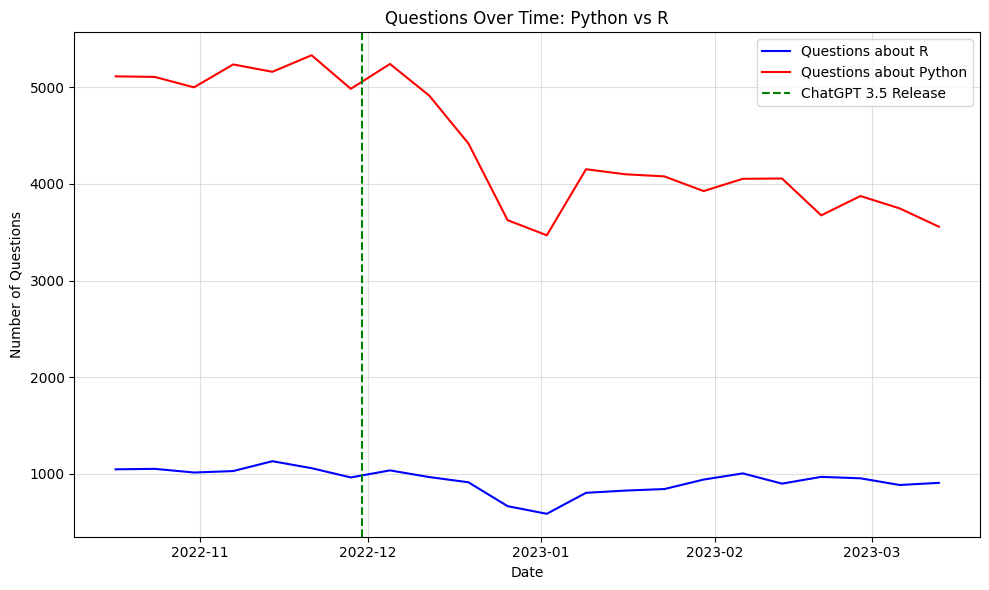

In [ ]:
# Votre code ci-dessous / Your code here below:

python_1 = df[df['python'] == 1]
python_0 = df[df['python'] == 0]

#python = 1 -> python related questions
#python = 0 -> questions about R

print("/n")

# display the datasets (the first 10 rows)
print("DATASET 1: Python-related questions (python = 1)")
print("-" * 50)
#print(f"Number of records: {len(python_1)}")
#print(f"Date range: {python_1['date'].min()} to {python_1['date'].max()}")
print("\nFirst 10 rows:")
print(python_1.head(10))

print("\n")
print("DATASET 2: R-related questions (python = 0)")
print("-" * 50)
#print(f"Number of records: {len(python_0)}")
#print(f"Date range: {python_0['date'].min()} to {python_0['date'].max()}")
print("\nFirst 10 rows:")
print(python_0.head(10))


plt.figure(figsize=(10, 6))

plt.plot(python_0['date'], python_0['question'], color='blue', label='Questions about R')
plt.plot(python_1['date'], python_1['question'], color='red', label='Questions about Python')

chatgpt_release = pd.to_datetime('2022-11-30')
plt.axvline(x=chatgpt_release, color='green', linestyle='--', label='ChatGPT 3.5 Release')

plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.title('Questions Over Time: Python vs R')
plt.legend()

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# Put comments and edit explanations here:


Le graphique est difficile à interpréter, car les lignes se situent à des niveaux différents. Il est donc nécessaire de les remettre à l'échelle afin de les rendre comparables et de faciliter leur interprétation.

**b)** Rendre le graphique interprétable : (6)  
* Remettez à l'échelle les deux séries, c'est-à-dire la variable *question* lorsque *python* est soit 0, soit 1. Pour ce faire, normalisez chaque série de manière à ce qu'elle prenne la valeur 1 à la première date disponible (assurez-vous de normaliser correctement l’ensemble de la série). Au final, vous devriez obtenir une nouvelle variable appelée *question_rescaled* dans votre dataframe initial *df*. (4)  
* Répétez l'exercice pour le graphique en utilisant la série ajustée (indice : les lignes devraient maintenant être beaucoup plus proches). (2)  

---

The graph is difficult to interpret, since the lines are on different levels. Hence, they need to be rescaled in order to make them comparable and facilitate the interpretation.

**b)** Make the graph interpretable: (6)
*   Rescale both series, i.e. the variable *question* for when *python* is either 0 or 1. Do so by normalizing each series to have a value of 1 on the first available date (make sure to normalize the entire series correctly). In the end you should have a new variable called *question_rescaled* in your initial dataframe *df*. (4)
*   Repeat the excercise for the graph with the adjusted series (hint: the lines should be a lot closer now). (2)

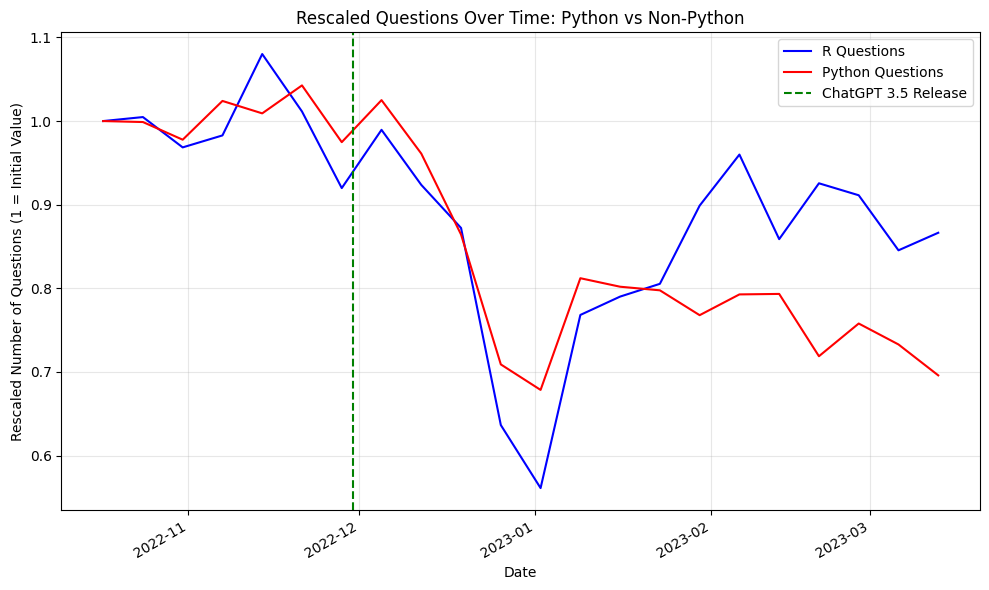

In [ ]:
# Votre code ci-dessous / Your code here below:

# create two separate datasets
python_1 = df[df['python'] == 1].copy()
python_0 = df[df['python'] == 0].copy()

first_question_python_1 = python_1.iloc[0]['question']
first_question_python_0 = python_0.iloc[0]['question']

python_1['question_rescaled'] = python_1['question'] / first_question_python_1
python_0['question_rescaled'] = python_0['question'] / first_question_python_0


plt.figure(figsize=(10, 6))

plt.plot(python_0['date'], python_0['question_rescaled'], color='blue', label='R Questions')
plt.plot(python_1['date'], python_1['question_rescaled'], color='red', label='Python Questions')

chatgpt_release = pd.to_datetime('2022-11-30')
plt.axvline(x=chatgpt_release, color='green', linestyle='--', label='ChatGPT 3.5 Release')

plt.xlabel('Date')
plt.ylabel('Rescaled Number of Questions (1 = Initial Value)')
plt.title('Rescaled Questions Over Time: Python vs Non-Python')
plt.legend()

plt.gcf().autofmt_xdate()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#comments:
# changed non-python to R in label -j
# KeyError: 'question_rescaled'  The above exception was the direct cause of the following exception: it fucked up for me :(  -j fixed with a conversion at the start -j
# broke again so use another way for questions rescaled to avoid error


**c)** Interprétez le résultat :
Que constatez-vous dans le nouveau graphique avec la série ajustée ? Y a-t-il des éléments qui vous paraissent surprenants ou intéressants ? Quelle est la cause de la plus forte baisse ? Pour répondre à cette question, examinez de plus près la variable concernée. Vous pouvez le faire en présentant des statistiques descriptives ou en traçant un graphique informatif. (4)  


---

**c)** Interpret the result: What do you see in the new graph with the adjusted series? Is there something that strikes you as surprising or interesting? What is causing the biggest drop? Answer this question by taking a closer look at the the relevant variable. This can be done by either reporting some statistics, or ploting an informative graph. (4)


Python questions lowest point: 0.68 on 2023-01-02
Python questions dropped by 32.2%
R-questions lowest point: 0.56 on 2023-01-02
R-questions dropped by 43.9%


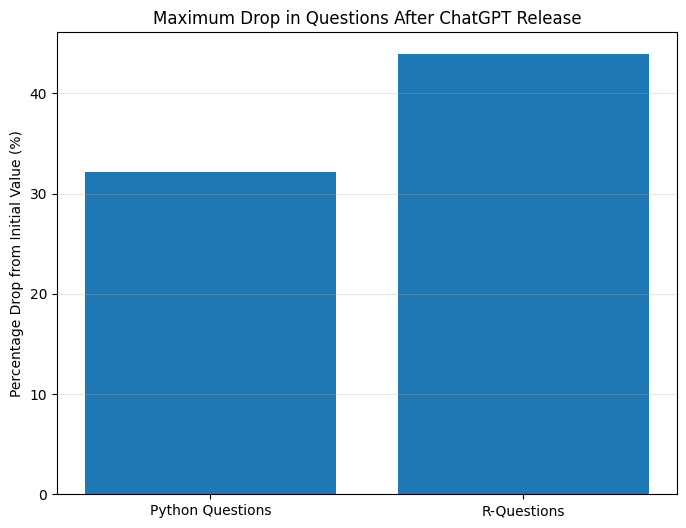

In [ ]:
# Votre code ci-dessous / Your code here below:

# Both Python and R questions experienced a significant drop after ChatGPT's release, reaching their lowest point around january 2023
# After the initial drop, R questions recovered more strongly than Python questions.
# By March 2023, R questions returned to about 85% of their initial level, while Python questions remained at around 70% of their initial level.
# The biggest drop appears to be in the R questions category, which fell to about 55% of its initial value in january 2023 before recovering

# ChatGPT's release had a stronger and more lasting impact on Python-related questions than on R-related questions.
# explanation:
# - ChatGPT is particularly good at helping with programming tasks
# - Python's readability and syntax make it easier for AI models to generate correct code compared to some other languages
# - Many beginner Python questions that would typically be asked online can now be answered directly by ChatGPT
# - The recovery in R-related questions suggests that they have returned to traditional forums for other types of questions.



python_min = python_1['question_rescaled'].min()
R_min = python_0['question_rescaled'].min()

min_python_row = python_1.loc[python_1['question_rescaled'] == python_min]
min_R_row = python_0[python_0['question_rescaled'] == R_min]

python_min_date = min_python_row['date'].iloc[0]
R_min_date = min_R_row['date'].iloc[0]

python_drop = (1 - python_min) * 100
R_drop = (1 - R_min) * 100

print(f"Python questions lowest point: {python_min:.2f} on {python_min_date.strftime('%Y-%m-%d')}")
print(f"Python questions dropped by {python_drop:.1f}%")
print(f"R-questions lowest point: {R_min:.2f} on {R_min_date.strftime('%Y-%m-%d')}")
print(f"R-questions dropped by {R_drop:.1f}%")

plt.figure(figsize=(8, 6))
plt.bar(['Python Questions', 'R-Questions'], [python_drop, R_drop])
plt.ylabel('Percentage Drop from Initial Value (%)')
plt.title('Maximum Drop in Questions After ChatGPT Release')
plt.grid(axis='y', alpha=0.3)
plt.show()


# comments:
# not sure if the bar chart is really needed, if you have a better idea let me know! -E
# I matched the df names to those i had to change in the previous cell for it to work -j
# should we indicate the unscaled amount of questions to in the finale answer? -j
# add why drop and due to holidays




## 3. Analyse / Analysis (40)  
### 3.1 Analyser le 'nombre de questions' posées / Analyze the 'number of questions' asked (18)  

**a)** Effectuez une régression linéaire : Vous souhaitez estimer l'effet de ChatGPT sur le nombre de questions hebdomadaires en utilisant la série ajustée de la question 2 (*question_rescaled*), selon si Python est utilisé ou non (réfléchissez à la manière d'implémenter la régression afin de différencier l'effet selon que Python ou R est utilisé). Exécutez l'estimation et présentez le tableau de régression.  (4)  


---

**a)** Run a linear regression: you are interested in the effect of ChatGPT on the number of weekly questions (use the adjusted series from question 2: *question_rescaled*), depending on whether Python is used or not (think carefully on how to implement the regression and how you can differentiate the effect depending on whether Python or R are used). Run the estimation and report the regression table. (4)

In [ ]:
# Votre code ci-dessous / Your code here below:
df = pd.concat([python_0, python_1]).sort_index()
df['question_rescaled'] = df['question_rescaled'].astype(float)
df['chatgpt'] = df['chatgpt'].astype(int)
df['python'] = df['python'].astype(int)

model = smf.ols("question_rescaled ~ chatgpt * python", df).fit()

print(model.summary())


# comments:


                            OLS Regression Results                            
Dep. Variable:      question_rescaled   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     13.26
Date:                Fri, 23 May 2025   Prob (F-statistic):           3.74e-06
Time:                        15:43:04   Log-Likelihood:                 44.835
No. Observations:                  44   AIC:                            -81.67
Df Residuals:                      40   BIC:                            -74.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9954      0.035     28.

**b)** Utilisez l'estimation de a) et créez un graphique de l'effet de difference-in-difference (avant et après la publication de ChatGPT). Pour ce faire, tracez les observations réelles, c'est-à-dire *question_rescaled*, sous forme de points. Notez que la variable *week* peut être utilisée sur l'axe des x. Ajoutez ensuite les valeurs ajustées sous forme de lignes. Assurez-vous que le graphique est informatif et que vous différenciez si Python ou R a été utilisé (par exemple, avec des couleurs différentes). Ajoutez une ligne verticale à la date de sortie de ChatGPT 3.5. N'oubliez pas d'étiqueter l'axe. Ajoutez une légende au graphique. (7)

---

**b)** Use the estimation from a) and create a graph of the difference-in-difference effect (before and after the release of ChatGPT). To do so, plot the actual observations, i.e. *question_adjusted*, as points. The variable *week* can be used on the x-axis. Then add the fitted values as lines. Make sure the graph is informative and you differentiate between whether Python or R was used (e.g. with different colors). Add a vertical line at the date when ChatGPT 3.5 was released, and don't forget to label the axis. Add a graph legend. (7)

                            OLS Regression Results                            
Dep. Variable:      question_rescaled   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     13.26
Date:                Fri, 23 May 2025   Prob (F-statistic):           3.74e-06
Time:                        15:52:40   Log-Likelihood:                 44.835
No. Observations:                  44   AIC:                            -81.67
Df Residuals:                      40   BIC:                            -74.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9954      0.035     28.

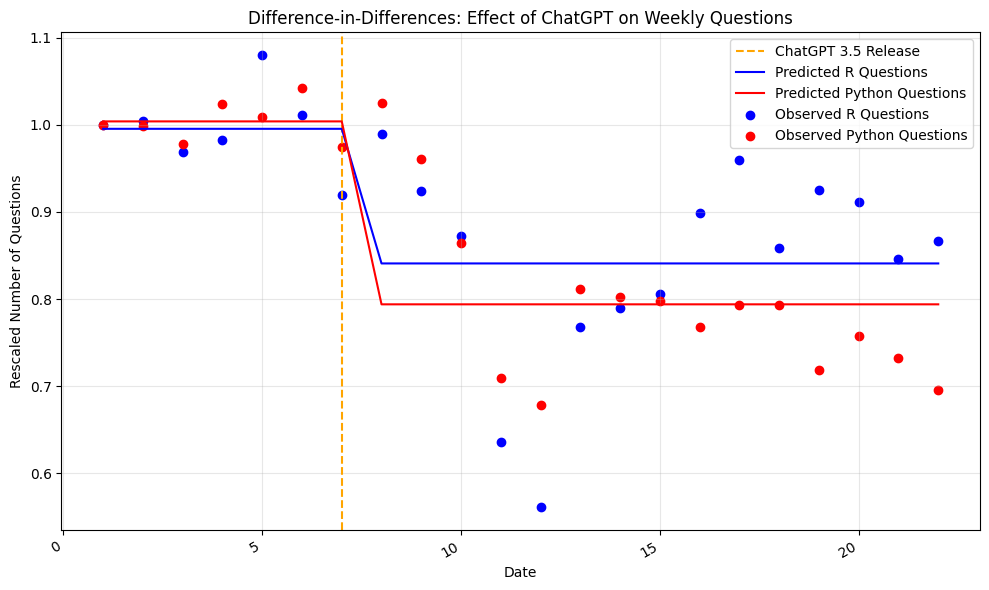

In [ ]:
# Votre code ci-dessous / Your code here below:

model = smf.ols("question_rescaled ~ chatgpt * python", data=df).fit()

df['predicted'] = model.fittedvalues
print(model.summary())


python_0 = df[df['python'] == 0]
python_1 = df[df['python'] == 1]

plt.figure(figsize=(10, 6))

chatgpt_release = pd.to_datetime('2022-11-30')
week_release = df.loc[(df['date'] - chatgpt_release).abs().idxmin()]['week']

plt.axvline(week_release, color='orange', linestyle='--', label='ChatGPT 3.5 Release')

plt.plot(python_0['week'], python_0['predicted'], color='blue', label='Predicted R Questions')
plt.plot(python_1['week'], python_1['predicted'], color='red', label='Predicted Python Questions')

plt.scatter(python_0['week'], python_0['question_rescaled'], color='blue', label='Observed R Questions')
plt.scatter(python_1['week'], python_1['question_rescaled'], color='red', label='Observed Python Questions')

plt.xlabel('Date')
plt.ylabel('Rescaled Number of Questions')
plt.title('Difference-in-Differences: Effect of ChatGPT on Weekly Questions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# comments:
# month dummy variable controls for fixed time effect like seasonality
# removed time fixed effect because it presented too much multicolinearity

D'après l'analyse descriptive initiale, il semble que l'effet prenne du temps à se faire sentir. Par conséquent, nous allons ajuster légèrement l'ensemble de données.  

**c)**  Créez une copie du dataframe existant *df* et appelez-le *df_s*.  Excluez ensuite les semaines 9 à 12 (cela vous permettra de comparer l'effet uniquement après les vacances de fin d'année).  (4)

**d)** Répétez l'exercice de **a)** (estimation de la régression) et **b)** (graphique). (3)


---

From the initial descriptive analysis it seems that the effect takes time to kick in. Therefore, we will adjust the dataset slightly.

**c)** Create a copy of the existing dataframe *df* and call it *df_s*. Then exclude the weeks 9-12 (this will allow you to only compare the effect after the end of the year holiday). (4)

**d)** Repeat the excercise from a) (regression estimation) and b) (graph). (3)

                            OLS Regression Results                            
Dep. Variable:      question_rescaled   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     20.61
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.92e-07
Time:                        15:43:04   Log-Likelihood:                 46.543
No. Observations:                  34   AIC:                            -85.09
Df Residuals:                      30   BIC:                            -78.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9954      0.025     40.

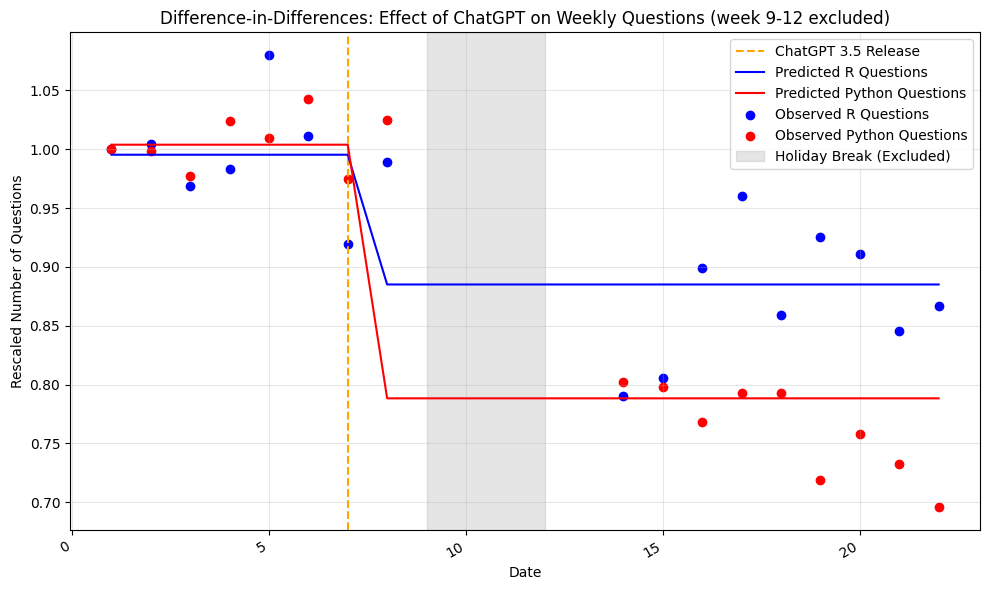

In [ ]:
# Votre code ci-dessous / Your code here below:

df_s = df[~df['week'].between(9,13)].copy()

# a)
model2 = smf.ols("question_rescaled ~ chatgpt * python", df_s).fit()
print(model2.summary())

# b)
model2 = smf.ols("question_rescaled ~ chatgpt * python", df_s).fit()

df_s['predicted'] = model2.fittedvalues

python_0 = df_s[df_s['python'] == 0]
python_1 = df_s[df_s['python'] == 1]

plt.figure(figsize=(10, 6))

chatgpt_release = pd.to_datetime('2022-11-30')
week_release = df_s.loc[(df['date'] - chatgpt_release).abs().idxmin()]['week']

plt.axvline(week_release, color='orange', linestyle='--', label='ChatGPT 3.5 Release')

plt.plot(python_0['week'], python_0['predicted'], color='blue', label='Predicted R Questions')
plt.plot(python_1['week'], python_1['predicted'], color='red', label='Predicted Python Questions')

plt.scatter(python_0['week'], python_0['question_rescaled'], color='blue', label='Observed R Questions')
plt.scatter(python_1['week'], python_1['question_rescaled'], color='red', label='Observed Python Questions')

plt.axvspan(9, 12, color='grey', alpha=0.2, label='Holiday Break (Excluded)')

plt.xlabel('Date')
plt.ylabel('Rescaled Number of Questions')
plt.title('Difference-in-Differences: Effect of ChatGPT on Weekly Questions (week 9-12 excluded)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# comments:


### 3.2 Analyser le score des questions (*vote_mean*) / Analyse the score of the questions (*vote_mean*) (12)

Cette section suit la même approche que le point **3.1**, mais en considérant désormais la moyenne du score (*vote_mean*) comme variable de résultat. Utilisez le dataframe original *df*.  

**a)**  Effectuez une régression linéaire pour estimer l'effet de ChatGPT sur la moyenne du score (*vote_mean*), en prenant en compte si Python ou R est utilisé (envisagez d'utiliser la variable *python*). Exécutez l'estimation et présentez le tableau de régression. (4)  

**b)** Représentez graphiquement le résultat de la même manière que **b)** au point **3.1**. Assurez-vous d'inclure toutes les informations nécessaires pour rendre le graphique clair et informatif.  (4)

---

Similar to 3.1, but now we consider the mean of the score as the outcome variable. Start again with the original dataframe *df*.

**a)** Run a linear regression: you are interested in the effect of ChatGPT on the mean of the score (the variable *vote_mean*), depending on whether Python or R is used (consider using the variable *python*). Run the estimation and report the regression table. (4)

**b)** Plot the result similar to b) in 3.1. Make sure to include all necessary information in the graph. (4)

                            OLS Regression Results                            
Dep. Variable:              vote_mean   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     87.04
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.41e-17
Time:                        15:43:05   Log-Likelihood:                 58.563
No. Observations:                  44   AIC:                            -109.1
Df Residuals:                      40   BIC:                            -102.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5456      0.025     21.

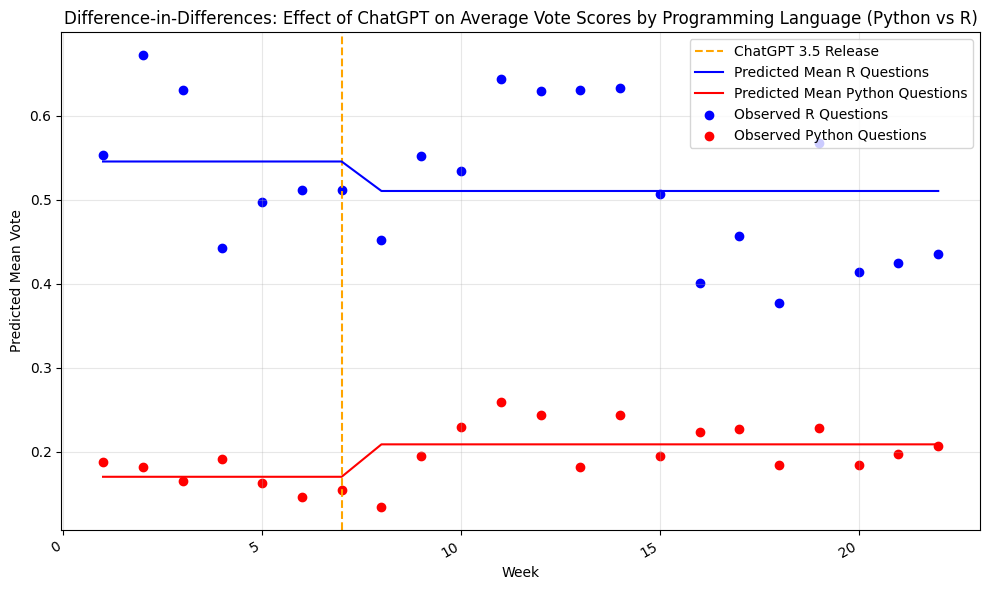

In [ ]:
# Votre code ci-dessous / Your code here below:
df['chatgpt'] = df['chatgpt'].astype(int)
df['python'] = df['python'].astype(int)

model3 = smf.ols("vote_mean ~ chatgpt * python", df).fit()

print(model3.summary())

df['predicted_mean'] = model3.fittedvalues

python_0 = df[df['python'] == 0]
python_1 = df[df['python'] == 1]

plt.figure(figsize=(10, 6))

chatgpt_release = pd.to_datetime('2022-11-30')
week_release = df.loc[(df['date'] - chatgpt_release).abs().idxmin()]['week']

plt.axvline(week_release, color='orange', linestyle='--', label='ChatGPT 3.5 Release')

plt.plot(python_0['week'], python_0['predicted_mean'], color='blue', label='Predicted Mean R Questions')
plt.plot(python_1['week'], python_1['predicted_mean'], color='red', label='Predicted Mean Python Questions')

plt.scatter(python_0['week'], python_0['vote_mean'], color='blue', label='Observed R Questions')
plt.scatter(python_1['week'], python_1['vote_mean'], color='red', label='Observed Python Questions')

plt.xlabel('Week')
plt.ylabel('Predicted Mean Vote')
plt.title('Difference-in-Differences: Effect of ChatGPT on Average Vote Scores by Programming Language (Python vs R)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# comments:
#btw vote_mean is vote/question in original df
#vote_mean : The average score per question, reflecting user-perceived quality. (énoncé)



**c)** Effectuez le même exercice qu'en 3.2 a) et b), mais en utilisant maintenant l'ensemble de données restreint, c'est-à-dire *df_s*. (4)

---

**c)** Run the same excercise as in 3.2 a) and b), but now using the restricted dataset, i.e. *df_s*. (4)

                            OLS Regression Results                            
Dep. Variable:              vote_mean   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     79.17
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.36e-14
Time:                        15:43:05   Log-Likelihood:                 49.721
No. Observations:                  34   AIC:                            -91.44
Df Residuals:                      30   BIC:                            -85.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5456      0.023     24.

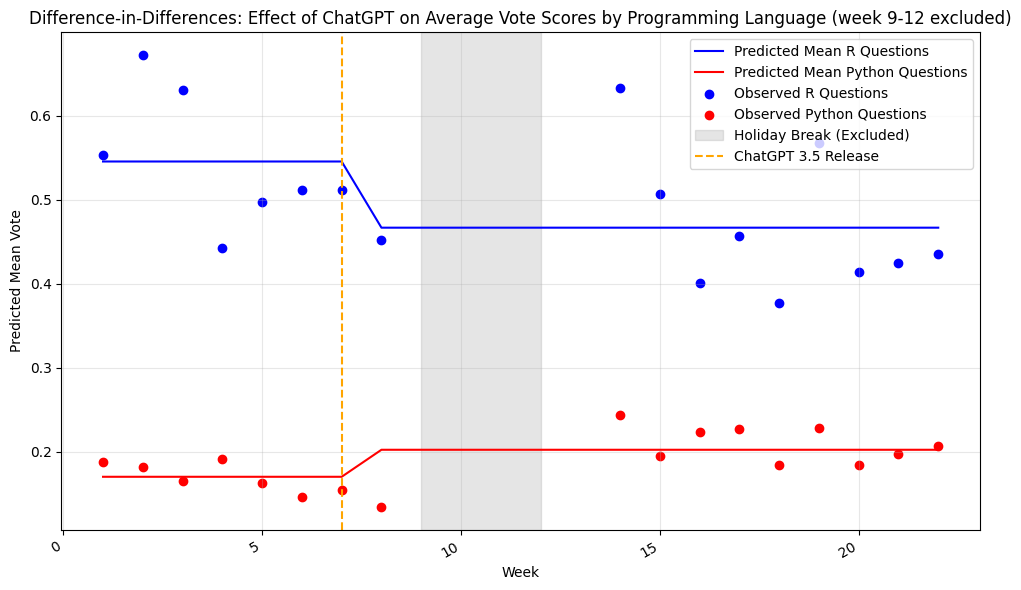

In [ ]:
# Votre code ci-dessous / Your code here below:

df_s = df[~df['week'].between(9,13)].copy()

# a)
model4 = smf.ols("vote_mean ~ chatgpt * python", df_s).fit()
print(model4.summary())

# b)
#conversion in case
df_s['chatgpt'] = df_s['chatgpt'].astype(int)
df_s['python'] = df_s['python'].astype(int)

#model
model4 = smf.ols("vote_mean ~ chatgpt * python", df_s).fit()

print(model4.summary())

df_s['predicted_mean'] = model4.fittedvalues

# prediction line and scatter
plt.figure(figsize=(10, 6))


python_0 = df_s[df_s['python'] == 0]
python_1 = df_s[df_s['python'] == 1]


plt.plot(python_0['week'], python_0['predicted_mean'], color='blue', label='Predicted Mean R Questions')
plt.plot(python_1['week'], python_1['predicted_mean'], color='red', label='Predicted Mean Python Questions')

plt.scatter(python_0['week'], python_0['vote_mean'], color='blue', label='Observed R Questions')
plt.scatter(python_1['week'], python_1['vote_mean'], color='red', label='Observed Python Questions')

#exclusion area
plt.axvspan(9, 12, color='grey', alpha=0.2, label='Holiday Break (Excluded)')

#DiD line
plt.axvline(week_release, color='orange', linestyle='--', label='ChatGPT 3.5 Release')

chatgpt_release = pd.to_datetime('2022-11-30')
week_release = df_s.loc[(df['date'] - chatgpt_release).abs().idxmin()]['week']

#labels and legend
plt.xlabel('Week')
plt.ylabel('Predicted Mean Vote')
plt.title('Difference-in-Differences: Effect of ChatGPT on Average Vote Scores by Programming Language (week 9-12 excluded)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# comments:




### 3.3 Analyse de l'impact sur les 'questions sans réponse' et sur le nombre de 'vues des questions' / Analyse how the 'no answer' questions, and the 'question views' have been affected (10)


Enfin, nous nous intéressons à l'effet de ChatGPT sur le nombre de questions qui n'ont pas reçu de réponse (*noanswer_mean*) et sur le nombre de vues que les questions ont reçues en moyenne (*view_mean*).  

**a)** Analysez l'effet de ChatGPT sur les variables *noanswer_mean* et *view_mean* en effectuant deux régressions distinctes. Comme précédemment, examinez comment l'effet diffère selon que Python ou R est utilisé (astuce : utilisez la variable *python* pour aider à cette différenciation). Exécutez les estimations et présentez les tableaux de régression.   (4)

**b)** Pour chaque coefficient estimé, commentez sa signification statistique. (6)

---

Finally we are interested in the effect of ChatGPT on the amount of questions that have not received an answer (*noanswer_mean*), and the amount of vies the questions ahve receiccved on average (*view_mean*).

**a)** You are interested in the effect of ChatGPT on the variables *noanswer_mean* and *view_mean* (run two separate regressions). As before, you want to know how the effect differes depending on whether Python or R is used (hint: use the variable *python* to help with that differentiation). Run the estimations and report the regression tables. (4)

**b)** For each coefficient, say something about their statistical significance. (6)


In [ ]:
# Votre code ci-dessous / Your code here below:
print("\n" * 2)
# a)
# First regression -> effect on questions with no answers
model_noanswer = smf.ols("noanswer_mean ~ chatgpt * python", df).fit()
print("Regression Results for No Answer Questions (noanswer_mean):")
print("=" * 60)
print(model_noanswer.summary())

print("\n" * 2)

# Second regression -> effect on question views
model_view = smf.ols("view_mean ~ chatgpt * python", df).fit()
print("Regression Results for Question views (view_mean):")
print("=" * 60)
print(model_view.summary())

print("\n" * 3)

# b)
# ---------------------- Statistical Significance Analysis -----------------------
print("Statistical Significance Analysis:")
print("=" * 40)
print("\n")

# ------------------------------ For Question Views ------------------------------
print("For No Answer Questions:")
print("-" * 40)

# P-values for noanswer model
noanswer_pvalues = model_noanswer.pvalues
noanswer_coef = model_noanswer.params
#print(noanswer_pvalues)
#print(noanswer_coef)

#print("\n")

# coef - intercept
print(f"Intercept coefficient: {noanswer_coef['Intercept']:.4f}, p-value: {noanswer_pvalues['Intercept']:.4f}")
if noanswer_pvalues['Intercept'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - ChatGPT
print(f"ChatGPT coefficient: {noanswer_coef['chatgpt']:.4f}, p-value: {noanswer_pvalues['chatgpt']:.4f}")
if noanswer_pvalues['chatgpt'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - Python
print(f"Python coefficient: {noanswer_coef['python']:.4f}, p-value: {noanswer_pvalues['python']:.4f}")
if noanswer_pvalues['python'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - Interaction
print(f"Interaction coefficient: {noanswer_coef['chatgpt:python']:.4f}, p-value: {noanswer_pvalues['chatgpt:python']:.4f}")
if noanswer_pvalues['chatgpt:python'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n" * 2)

# ------------------------------ For Question Views ------------------------------
print("For Question Views:")
print("-" * 40)

# p-values for views model
view_pvalues = model_view.pvalues
view_coef = model_view.params

#print("\n")

# coef - intercept
print(f"Intercept coefficient: {view_coef['Intercept']:.4f}, p-value: {view_pvalues['Intercept']:.4f}")
if view_pvalues['Intercept'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - ChatGPT
print(f"ChatGPT coefficient: {view_coef['chatgpt']:.4f}, p-value: {view_pvalues['chatgpt']:.4f}")
if view_pvalues['chatgpt'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - Python
print(f"Python coefficient: {view_coef['python']:.4f}, p-value: {view_pvalues['python']:.4f}")
if view_pvalues['python'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")

print("\n")

# coef - Interaction
print(f"Interaction coefficient: {view_coef['chatgpt:python']:.4f}, p-value: {view_pvalues['chatgpt:python']:.4f}")
if view_pvalues['chatgpt:python'] < 0.05:
    print("  -> Statistically significant at 5% level")
else:
    print("  -> Not statistically significant at 5% level")



# comments:











Regression Results for No Answer Questions (noanswer_mean):
                            OLS Regression Results                            
Dep. Variable:          noanswer_mean   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     17.67
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.85e-07
Time:                        19:27:09   Log-Likelihood:                 118.31
No. Observations:                  44   AIC:                            -228.6
Df Residuals:                      40   BIC:                            -221.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

## 4. Discussion de l'analyse empirique / Discussion of the empirical analysis (25)

**a)** Les hypothèses d'identification du modèle de difference-in-difference sont-elles valables? Discutez-en en 10 phrases maximum. (10)  

**b)** Résumez les résultats des régressions en un maximum de 10 phrases. (10)  

**c)**  Avez-vous d'autres observations ou réflexions sur la configuration de la régression, les résultats, ou les graphiques ? Y a-t-il des éléments qui mériteraient d'être rapportés, examinés de plus près, ou pris en compte dans une analyse ultérieure? Max 5 phrases. (5)  

---

**a)** Are the identifying assumptions of the difference-in-difference model valid? Discuss in max 10 sentences. (10)

**b)** Summarize the results from the regressions. Use a maximum of 10 sentences. (10)

**c)** Do you have any other observations, thoughts about the regression set-up, the results, the graphs that you think are important to report/take a closer look at/consider in further analysis? Max 5 sentences. (5)

Votre réponse ci-dessous / Your answer here below:

---

